##Carregando o dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix

#importando o arquivo
df = pd.read_csv('/content/drive/My Drive/DSM/datasetPI6.csv', sep=';')
df.head()

Mounted at /content/drive


,id_pedido,day_of_week,id_cliente,gender,age,id_restaurante,cousine_type,id_item,food_name,type_of_product,quantity,price,total_value
0,1,weekday,1,M,30 e 40,1,JAPONESA,1,Combinado Sushi Salmão,food,1,69.9,69.9
1,2,weekend,2,F,25 e 30,1,JAPONESA,1,Combinado Sushi Salmão,food,2,69.9,139.8
2,3,weekend,2,F,25 e 30,1,JAPONESA,5,Saquê,alcoholicDrink,2,11.9,23.8
3,4,weekday,3,M,18 e 25,1,JAPONESA,3,Teppanyaki,food,1,49.9,49.9
4,5,weekend,1,M,30 e 40,2,ITALIANA,7,Lasanha à Bolonhesa,food,1,44.9,44.9


In [2]:
#informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_pedido        566 non-null    int64  
 1   day_of_week      566 non-null    object 
 2   id_cliente       566 non-null    int64  
 3   gender           566 non-null    object 
 4   age              566 non-null    object 
 5   id_restaurante   566 non-null    int64  
 6   cousine_type     566 non-null    object 
 7   id_item          566 non-null    int64  
 8   food_name        566 non-null    object 
 9   type_of_product  566 non-null    object 
 10  quantity         566 non-null    int64  
 11  price            566 non-null    float64
 12  total_value      566 non-null    float64
dtypes: float64(2), int64(5), object(6)
memory usage: 57.6+ KB


#Tratamento de atributos com valores ausentes

In [3]:
# índices das linhas que contém valores NaN
idxRowNan = pd.isnull(df).any(1).to_numpy().nonzero()

# imprime apenas as linhas com valoes ausentes
display(df.iloc[idxRowNan])

<ipython-input-3-21d0a326ab41>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  idxRowNan = pd.isnull(df).any(1).to_numpy().nonzero()


,id_pedido,day_of_week,id_cliente,gender,age,id_restaurante,cousine_type,id_item,food_name,type_of_product,quantity,price,total_value


#Eliminação de atributos irrelevantes para a indicação de itens do menu (pratos)


In [4]:
# remove as colunas irrelevantes para indicação de tipo de cozinha
df = df.drop(columns=['id_pedido','day_of_week', 'gender', 'id_restaurante', 'cousine_type', 'id_item', 'type_of_product', 'quantity', 'price', 'total_value'])

# imprime o dataframe
display(df.head(n=10))

,id_cliente,age,food_name
0,1,30 e 40,Combinado Sushi Salmão
1,2,25 e 30,Combinado Sushi Salmão
2,2,25 e 30,Saquê
3,3,18 e 25,Teppanyaki
4,1,30 e 40,Lasanha à Bolonhesa
5,4,60+,Macarrão à carbonara
6,1,30 e 40,Guioza
7,1,30 e 40,Tiramisù
8,8,60+,Coca-cola
9,7,40 e 60,Combinado Hot Roll


#Gráfico de distribuição de itens dos menus

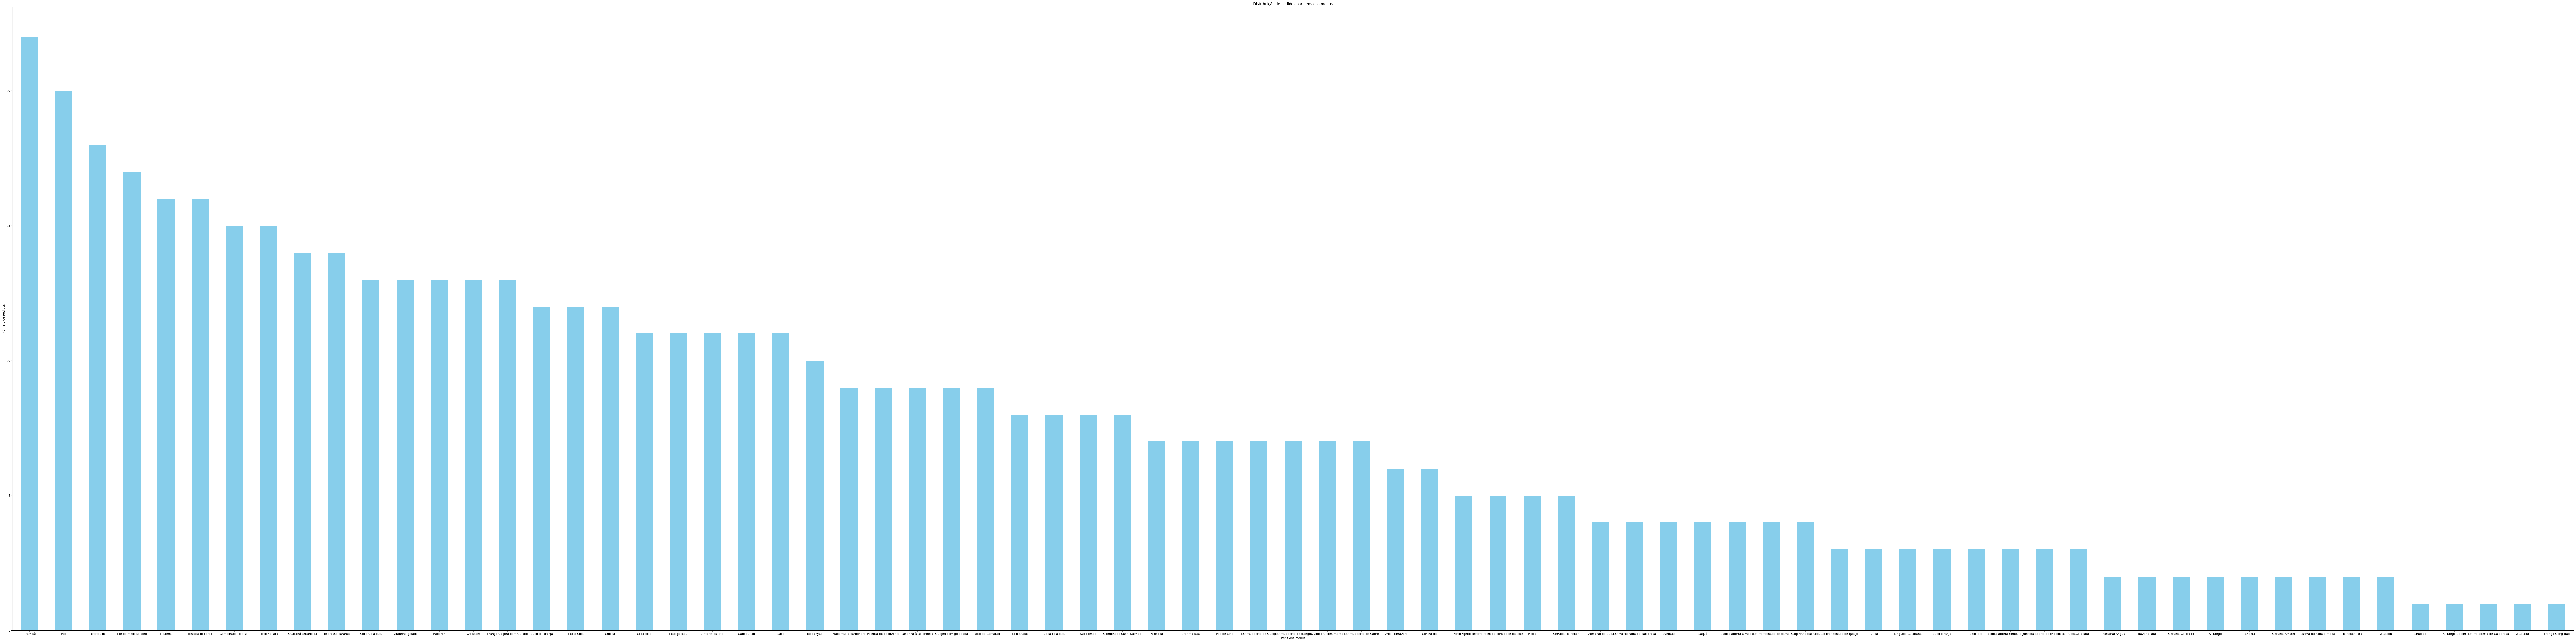

In [5]:
# Gerar gráfico de distribuição de itens dos menus
order_counts = df['food_name'].value_counts()

plt.figure(figsize=(120, 30))
order_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de pedidos por itens dos menus')
plt.xlabel('Itens dos menus')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

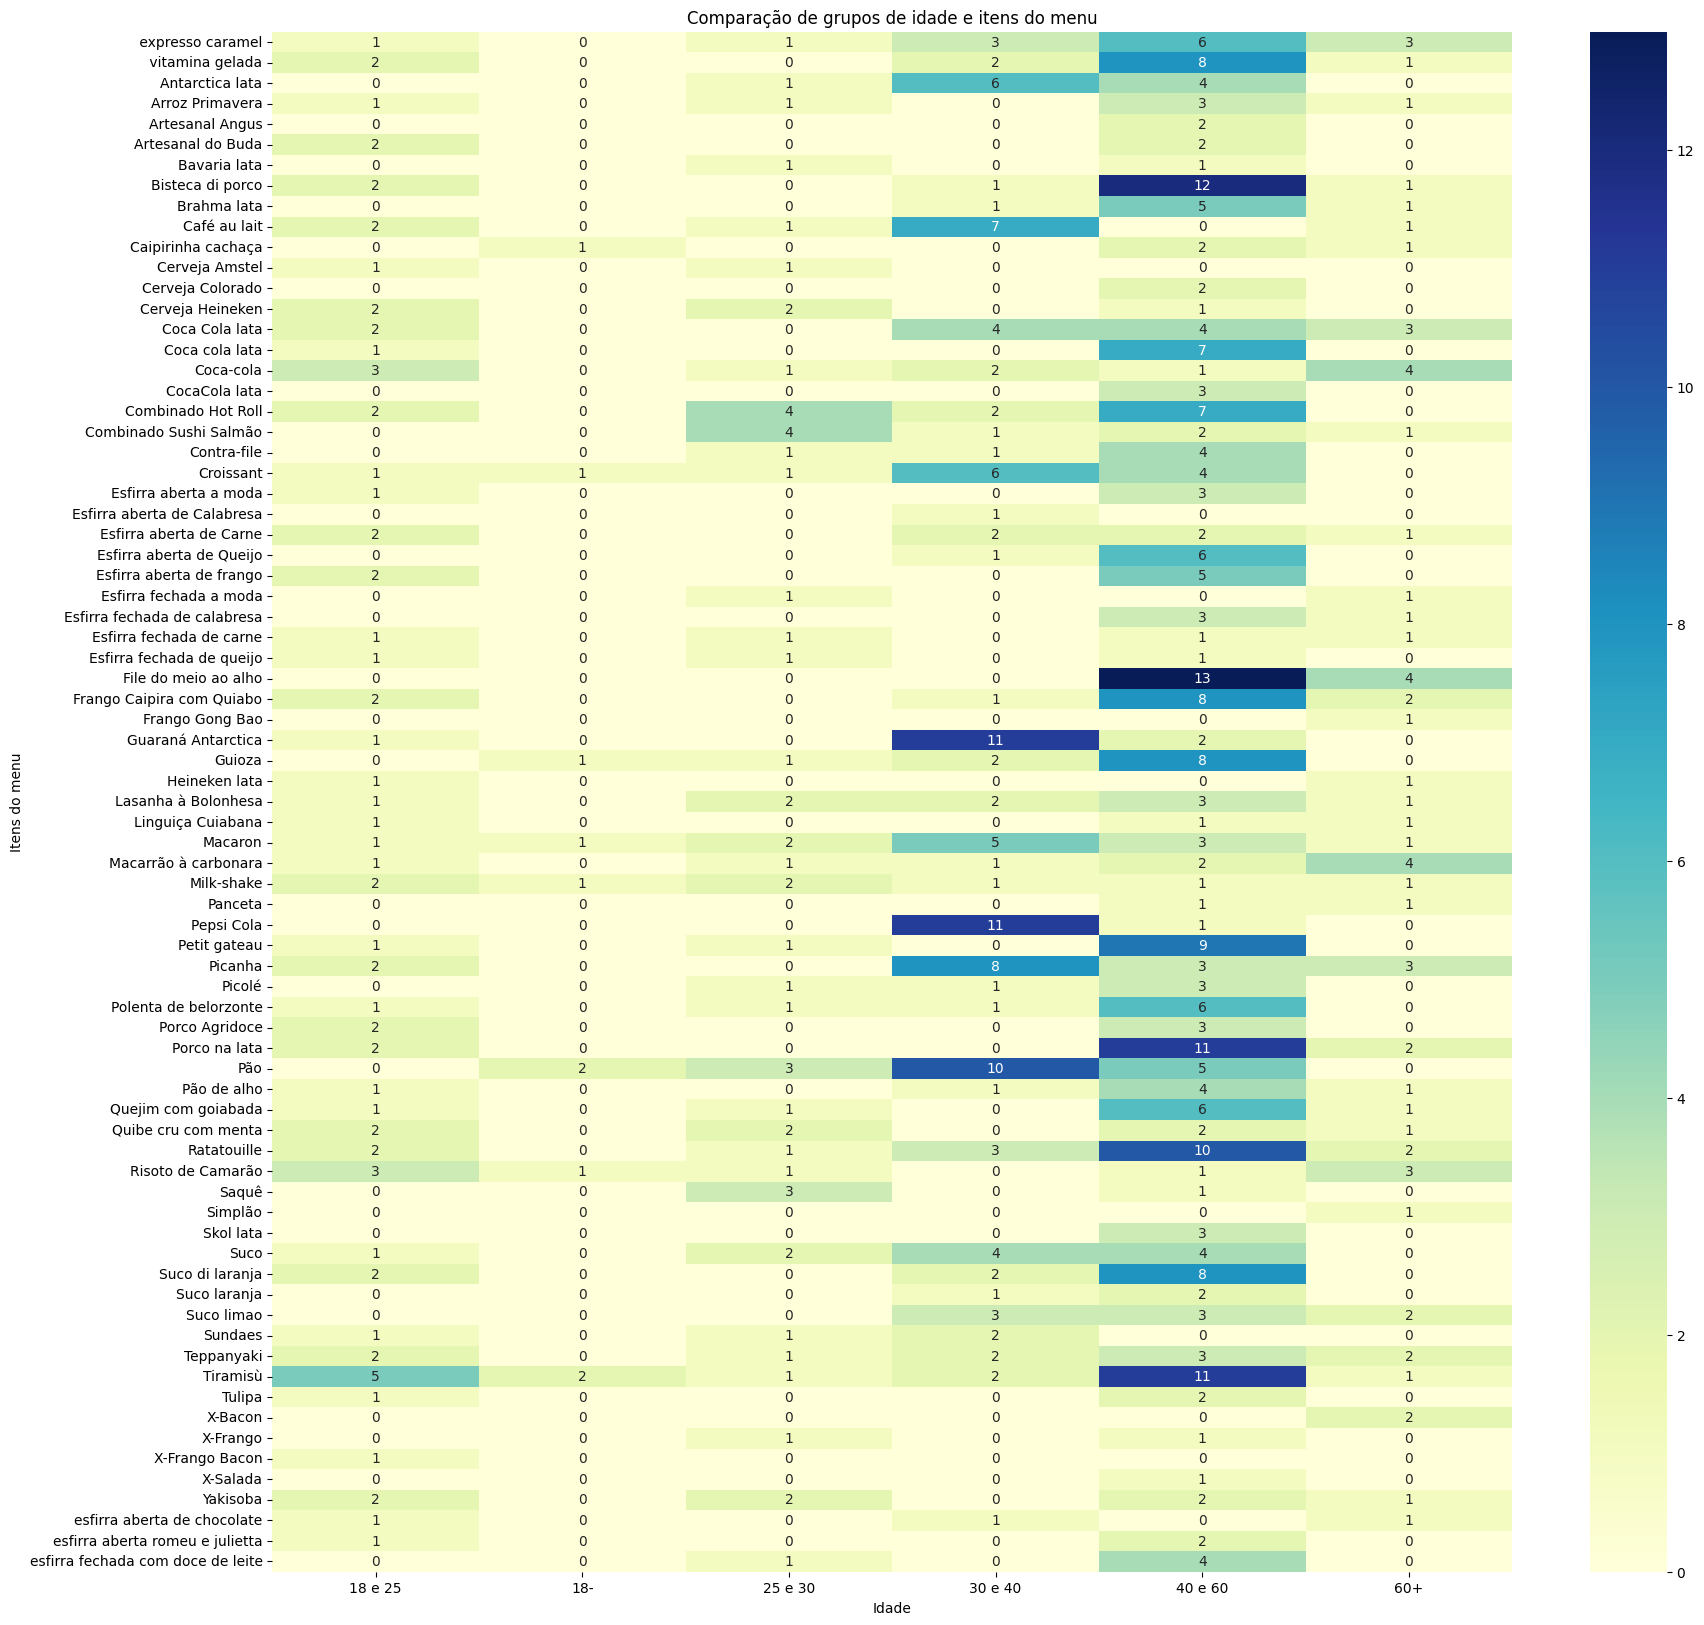

In [6]:
# Mapa de calor com comparação de grupos de idade itens do menu

age_cuisine_comparison = df.groupby('food_name')['age'].value_counts().unstack().fillna(0)

plt.figure(figsize=(20, 20))
sns.heatmap(age_cuisine_comparison, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Comparação de grupos de idade e itens do menu')
plt.xlabel('Idade')
plt.ylabel('Itens do menu')
plt.show()

#Algoritmo de RECOMENDAÇÃO - KNN:

In [7]:
#Instação da biblioteca surprise
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163480 sha256=897d52e768b7d5d774151f53d3be3e16e48b47bff200be2f08695f5f90275c27
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [8]:
#Instalação biblioteca decouple
!pip install decouple

  Preparing metadata (setup.py) ... done
  Created wheel for decouple: filename=decouple-0.0.7-py3-none-any.whl size=4466 sha256=010a0a4ed45eff9e931212dfd480f873257da4bb4174c0641771936f1f3a132f
  Stored in directory: /root/.cache/pip/wheels/96/74/a5/3329fa2711325ec50aad70c2c9f0658f0e812372af6a6e65ec
Successfully built decouple


In [10]:
##Algoritmo de RECOMENDAÇÃO - KNN

from sqlalchemy import create_engine
from surprise import Dataset, Reader, KNNBasic
from typing import List


try:
    food = input(str("Digite o prato:\n"))
    cousine = input(str("Digite o tipo de culinária (em maiuscula):\n"))


    df_sql_cousine = pd.read_csv('/content/drive/My Drive/DSM/cousineType.csv', sep=';')
    df_sql_food = pd.read_csv('/content/drive/My Drive/DSM/preferenceByAge.csv', sep=';')

    data = df_sql_cousine
    data.loc[data['age'] == '18-', 'age'] = 1
    data.loc[data['age'] == '18 e 25', 'age'] = 2
    data.loc[data['age'] == '25 e 30', 'age'] = 3
    data.loc[data['age'] == '30 e 40', 'age'] = 4
    data.loc[data['age'] == '40 e 60', 'age'] = 5
    data.loc[data['age'] == '60+', 'age'] = 6
    df = pd.DataFrame(data)

    #Define o formato do leitor
    reader = Reader(rating_scale=(1, 6))

    #Carrega o conjunto de dados
    data = Dataset.load_from_df(df[['user_id', 'cousine_type', 'age']], reader)

    #Cria o conjunto de treinamento
    trainset = data.build_full_trainset()

    #Cria o modelo KNN
    sim_options = {
        'name': 'cosine',
        'user_based': False
    }
    model = KNNBasic(sim_options=sim_options)
    model.fit(trainset)

    #Tipo de cozinha escolhida pelo cliente
    cousine_type = cousine

    #Obtendo recomendações para tipo de cozinha
    age_inner_id = trainset.to_inner_iid(cousine_type)
    neighbors = model.get_neighbors(age_inner_id, k=1)

    #Mapeando os IDs internos de volta para os IDs reais
    neighbors = [trainset.to_raw_iid(inner_id) for inner_id in neighbors]

    print(f"Quem pede culinária {cousine_type} Pode gostar também de:")
    for neighbor in neighbors:
        print(neighbor)

    #Recomendação de pratos

    data = df_sql_food
    data.loc[data['age'] == '18-', 'age'] = 1
    data.loc[data['age'] == '18 e 25', 'age'] = 2
    data.loc[data['age'] == '25 e 30', 'age'] = 3
    data.loc[data['age'] == '30 e 40', 'age'] = 4
    data.loc[data['age'] == '40 e 60', 'age'] = 5
    data.loc[data['age'] == '60+', 'age'] = 6
    df = pd.DataFrame(data)

    #Define o formato do leitor
    reader = Reader(rating_scale=(1, 6))

    #Carrega o conjutno de dados
    data = Dataset.load_from_df(df[['user_id', 'food_name', 'age']], reader)

    #Cria o conjunto de treinamento
    trainset = data.build_full_trainset()

    #Cria o modelo KNN
    sim_options = {
        'name': 'cosine',
        'user_based': False
    }
    model = KNNBasic(sim_options=sim_options)
    model.fit(trainset)

    #Prato escolhido pelo cliente
    food_name = food

    #Obtendo recomendações para prato
    age_inner_id_by_food = trainset.to_inner_iid(food_name)
    neighborsByfood = model.get_neighbors(age_inner_id_by_food, k=3)

    #Mapeando os IDs internos de volta para os IDs reais
    neighborsByfood = [trainset.to_raw_iid(inner_id) for inner_id in neighborsByfood]
    cousine_indication = []
    food_indication = []
    for neighbor in neighborsByfood:
        food_indication.append(neighbor)

    for neighbor in neighbors:
        cousine_indication.append(neighbor)

    # Criar uma instância da classe IndicationResponse
    print (cousine_indication)
    print (food_indication)

except:
    print("ops, algo errado")

Digite o prato:
Picanha
Digite o tipo de culinária (em maiuscula):
CHURRASCO
Computing the cosine similarity matrix...
Done computing similarity matrix.
Quem pede culinária CHURRASCO Pode gostar também de:
JAPONESA
Computing the cosine similarity matrix...
Done computing similarity matrix.
['JAPONESA']
['Combinado Sushi Salmão', 'Saquê', 'Teppanyaki']
